In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cam=cv2.VideoCapture(0)
detector=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

In [3]:
name=input("Enter the name of the person getting clicked:")
pics=[]
cnt=0

while True:
    ret,frame=cam.read()
    
    if ret== False:
        continue
    
    faces=detector.detectMultiScale(frame,1.1,5)
    if(len(faces)==0):
        continue
        
    face=faces[0]
      
    x,y,w,h=face
    frame=cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    cnt+=1 
    
    if cnt%10==0:
        cropped_face=frame[y:y+h,x:x+w]
        cropped_face=cv2.resize(cropped_face,(100,100))
        pics.append(cropped_face)
        print("Saving Face %d"%(cnt/10+1),end='\r')
        if(len(pics)==20):
            break
    
    cv2.imshow("frame",frame)
    key_pressed=cv2.waitKey(1) & 0xFF
    if(key_pressed==ord('q')):
        break
    
cam.release()
cv2.destroyAllWindows()

Enter the name of the person getting clicked:shreeya


In [4]:
data=np.array(pics)
np.save(name+".npy",data)

In [5]:
data.shape


(20, 100, 100, 3)

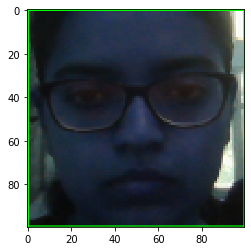

In [10]:
X=np.load("manali.npy")
plt.imshow(X[0])
plt.show()